# HOMEWORK 3

## California Housing Prices Dataset

- Kaggle link:   https://www.kaggle.com/datasets/camnugent/california-housing-prices
- Raw data link: https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We will work with the 'median_house_value' variable and turn it into a classification task.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Although feature names are looking clean, this is how to change feature names into proper form:

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Selecting categorical columns from data frame and setting values into proper form:

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == object].index)
categorical_columns

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In order to confirm that categorical features have been changed, we can use value_counts() or unique().

In [9]:
df["ocean_proximity"].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

In [10]:
df["ocean_proximity"].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

Looking more uniform, lowercase and spaces changed with underscores.

Filling missing values with "0"

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df['total_bedrooms'].isnull().sum()

0

### Data preparation

- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [13]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


## Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [14]:
df['ocean_proximity'].value_counts().index[0]

'<1h_ocean'

### Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
len(df_full_train), len(df_test)

(16512, 4128)

In [18]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [19]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1h_ocean,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,near_ocean,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,inland,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1h_ocean,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,near_ocean,7.010127,0.139762,2.516456


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

In [23]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [24]:
df_train.shape, df_val.shape, df_test.shape

((12384, 12), (4128, 12), (4128, 12))

In [25]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456


## Question 2

* Create the correlation matrix for the numerical features of your train dataset.
 * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

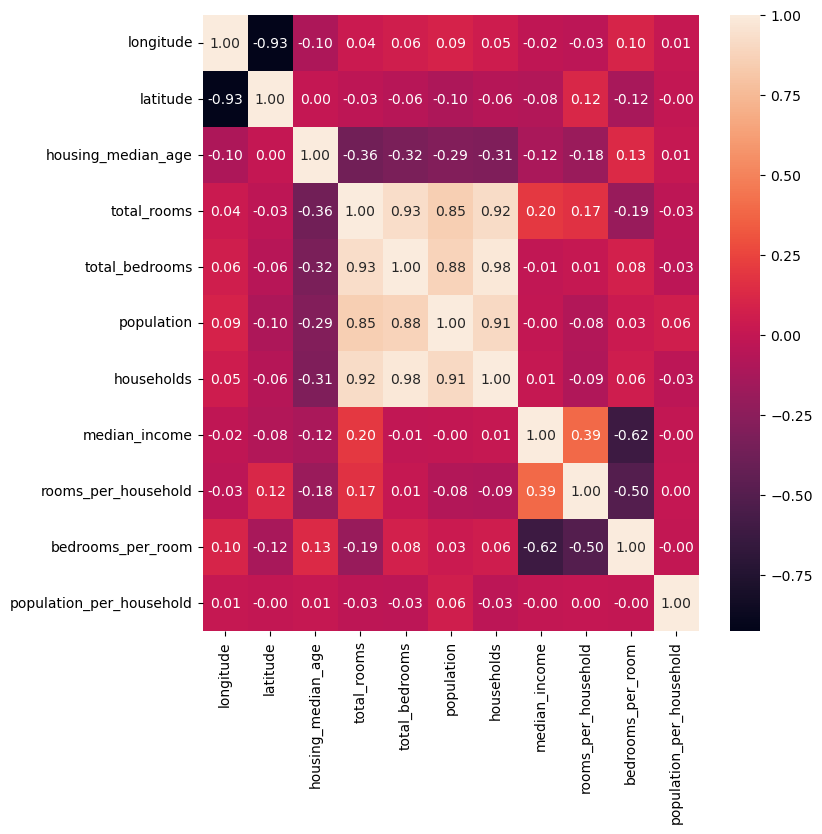

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f')
plt.show()

The most correlated two features in this dataset are 'total_bedrooms' and 'households'.

### Make median_house_value binary

* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [27]:
y_train_above_average = y_train.copy()
y_train_above_average = y_train_above_average > y_train_above_average.mean()
y_train_above_average = y_train_above_average.astype(int)
y_train_above_average

0        1
1        1
2        0
3        1
4        1
        ..
12379    0
12380    0
12381    1
12382    0
12383    0
Name: median_house_value, Length: 12384, dtype: int32

In [28]:
y_val_above_average = y_val.copy()
y_val_above_average = y_val_above_average > y_val_above_average.mean()
y_val_above_average = y_val_above_average.astype(int)
y_val_above_average

0       0
1       0
2       1
3       1
4       1
       ..
4123    0
4124    1
4125    1
4126    1
4127    0
Name: median_house_value, Length: 4128, dtype: int32

In [29]:
y_test_above_average = y_test.copy()
y_test_above_average = y_test_above_average > y_test_above_average.mean()
y_test_above_average = y_test_above_average.astype(int)
y_test_above_average

0       0
1       0
2       1
3       1
4       1
       ..
4123    1
4124    1
4125    1
4126    0
4127    0
Name: median_house_value, Length: 4128, dtype: int32

### Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mic = mutual_info_score(y_train_above_average, df_train["ocean_proximity"])
mic

0.10138385763624205

In [32]:
np.round(mic, 2)

0.1

### Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
 * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
 * model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [33]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456


#### One-hot encoding

In [34]:
df_train.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

Selecting categorical and numerical columns.

In [35]:
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)

numerical = list(df_train.select_dtypes(include=np.number))

print(categorical)
print(" ")
print(numerical)

['ocean_proximity']
 
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']


In [36]:
from sklearn.feature_extraction import DictVectorizer

In [37]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.fit_transform(test_dict)

In [38]:
X_train

array([[2.59713701e-01, 3.74000000e+02, 3.90000000e+01, ...,
        3.92245989e+00, 3.81000000e+02, 1.46700000e+03],
       [1.30227981e-01, 8.06000000e+02, 2.40000000e+01, ...,
        7.56451613e+00, 7.94000000e+02, 6.09700000e+03],
       [2.34624146e-01, 3.37000000e+02, 4.10000000e+01, ...,
        3.90801187e+00, 3.09000000e+02, 1.31700000e+03],
       ...,
       [1.82879377e-01, 6.02000000e+02, 1.80000000e+01, ...,
        5.54983389e+00, 6.11000000e+02, 3.34100000e+03],
       [2.29126214e-01, 3.50000000e+02, 1.60000000e+01, ...,
        4.41428571e+00, 3.54000000e+02, 1.54500000e+03],
       [2.09574468e-01, 2.15000000e+02, 3.50000000e+01, ...,
        4.37209302e+00, 1.97000000e+02, 9.40000000e+02]])

#### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train_above_average)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [41]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.08754291, 0.15993596, 0.95208568, ..., 0.95879498, 0.84936804,
       0.47231751])

In [42]:
decision = (y_pred >= 0.5)

In [43]:
decision

array([False, False,  True, ...,  True,  True, False])

In [44]:
y_val_above_average

0       0
1       0
2       1
3       1
4       1
       ..
4123    0
4124    1
4125    1
4126    1
4127    0
Name: median_house_value, Length: 4128, dtype: int32

#### Accuracy

In [45]:
accuracy_total = (y_val_above_average == decision).mean()
accuracy_total
np.round(accuracy_total, 2)

0.84

### Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
 - total_rooms
 - total_bedrooms
 - population
 - households

note: the difference doesn't have to be positive

Without 'total_rooms'

In [46]:
list_of_small = ["total_rooms", "total_bedrooms", "population", "households"]
list_of_lists = ['list1', 'list2', 'list3', 'list4']
accuracy_list = []
difference_list = []

In [47]:
def get_accuracy(feature_without):
    
    #for i in list_of_small:
    
        df_train1 = df_train.copy()
        del df_train1[feature_without]
    
        df_val1 = df_val.copy()
        del df_val1[feature_without]
    
        #one hot encoding
    
        categorical1 = list(df_train1.dtypes[df_train1.dtypes == 'object'].index)
        numerical1 = list(df_train1.select_dtypes(include=np.number))
    
        train_dict1 = df_train1[categorical1 + numerical1].to_dict(orient='records')
        X_train1 = dv.fit_transform(train_dict1)

        val_dict1 = df_val1[categorical1 + numerical1].to_dict(orient='records')
        X_val1 = dv.fit_transform(val_dict1)
    
        #logistic regression
    
        model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
        model.fit(X_train1, y_train_above_average)
        y_pred1 = model.predict_proba(X_val1)[:, 1]
        decision1 = (y_pred1 >= 0.5)
        accuracy1 = (y_val_above_average == decision1).mean()
        difference1 = abs(accuracy_total-accuracy1)
        
        accuracy_list.append(accuracy1)
        difference_list.append(difference1)
        
        if len(accuracy_list) == len(list_of_small):
            print(accuracy_list)
            print(difference_list)
                    
            txt = 'The {} feature has the smallest difference as {}.'
            print(txt.format(list_of_small[difference_list.index(min(difference_list))], difference1))
                  

In [48]:
for i in list_of_small:

    get_accuracy(i)

[0.8369670542635659, 0.8379360465116279, 0.8275193798449613, 0.8347868217054264]
[0.0002422480620154488, 0.001211240310077466, 0.009205426356589164, 0.0019379844961240345]
The total_rooms feature has the smallest difference as 0.0019379844961240345.


### Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

In [49]:
y_train

0        241400.0
1        500001.0
2         64100.0
3        277200.0
4        417000.0
           ...   
12379    154200.0
12380    146400.0
12381    215300.0
12382    139000.0
12383    181300.0
Name: median_house_value, Length: 12384, dtype: float64

In [50]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)
y_test_log = np.log(y_test)

In [51]:
y_train_log

0        12.394211
1        13.122365
2        11.068200
3        12.532495
4        12.940842
           ...    
12379    11.946006
12380    11.894098
12381    12.279788
12382    11.842229
12383    12.107908
Name: median_house_value, Length: 12384, dtype: float64

In [52]:
from sklearn.linear_model import Ridge

In [53]:
alpha_list = [0, 0.01, 0.1, 1, 10]

In [54]:
rmse_list = []

In [55]:
def rmse(y, y_pred):
    mse = ((y_pred - y) ** 2).mean()
    return np.sqrt(mse)

In [56]:
for a in alpha_list:
    
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train_log)
    
    y_predict_ridge = model.predict(X_train)
    y_predict_val = model.predict(X_val)
    
    score_val= np.round(rmse(y_val_log, y_predict_val), 3)
    
    rmse_list.append(score_val)
    print('RMSE for alpha = {} is {}.'.format(a, score_val))

print(" ")
print(dict(zip(alpha_list, rmse_list)))

RMSE for alpha = 0 is 0.524.
RMSE for alpha = 0.01 is 0.524.
RMSE for alpha = 0.1 is 0.524.
RMSE for alpha = 1 is 0.524.
RMSE for alpha = 10 is 0.524.
 
{0: 0.524, 0.01: 0.524, 0.1: 0.524, 1: 0.524, 10: 0.524}


RMSE values are very similar so the answer is 0 (smallest alpha).